<a href="https://colab.research.google.com/github/hhtnghia321/AdvM---SVM-assignment---Student-Math-Performance/blob/master/SVM_Kernel_Method_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVM - Kernel Method Assignment

I choose to use the Student Math Performance for this assignment. The problem is classification problem the student grade on Math of Portuguese School of the 1st year student.

Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


Attribute Information:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - 1 hour) 

14 studytime - weekly study time (numeric: 1 - 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - 10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

31 G1 - first period grade (numeric: from 0 to 20) (target variable)

##Loading Dataset and Library

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split

data = pd.read_csv("https://raw.githubusercontent.com/hhtnghia321/AdvM---SVM-assignment---Student-Math-Performance/master/student-mat.csv",
                   sep = ";")
Y = data["G1"]
train = data.copy().drop(["G2", "G3"],1)
data.drop(["G2", "G3", "G1"],1, inplace=True)

X_train, X_test,y_train, y_test = train_test_split(data, Y, test_size = 0.3, random_state= 123)


In [56]:
train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11


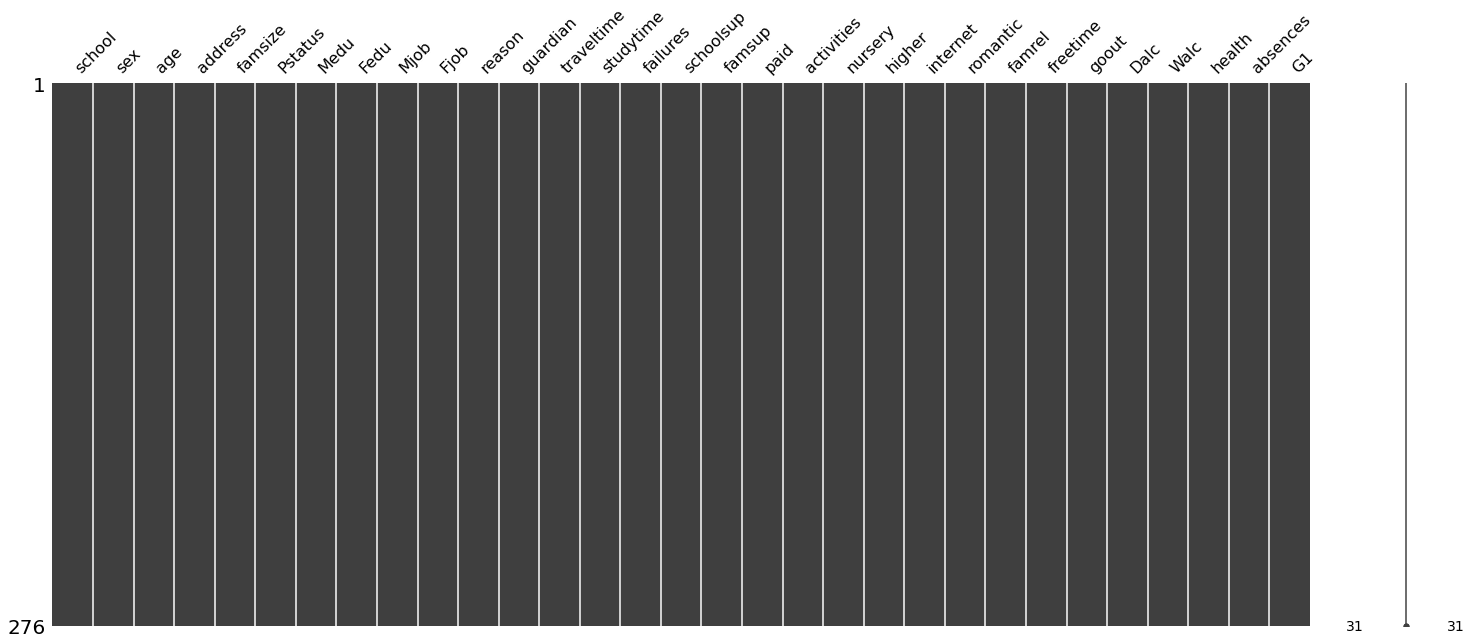

In [43]:
import missingno as miss
miss.matrix(train)
#no missing data


Counter({10: 34, 8: 30, 11: 30, 7: 29, 13: 23, 14: 23, 9: 23, 12: 18, 6: 18, 15: 17, 16: 13, 17: 6, 18: 6, 5: 4, 4: 1, 19: 1})


(array([ 5., 18., 59., 23., 64., 18., 46., 17., 19.,  7.]),
 array([ 4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. , 17.5, 19. ]),
 <a list of 10 Patch objects>)

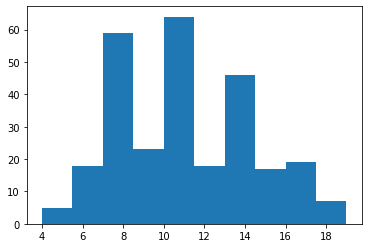

In [44]:

print(Counter(train["G1"]))
plt.hist(train["G1"])

* the data is more of center clustered

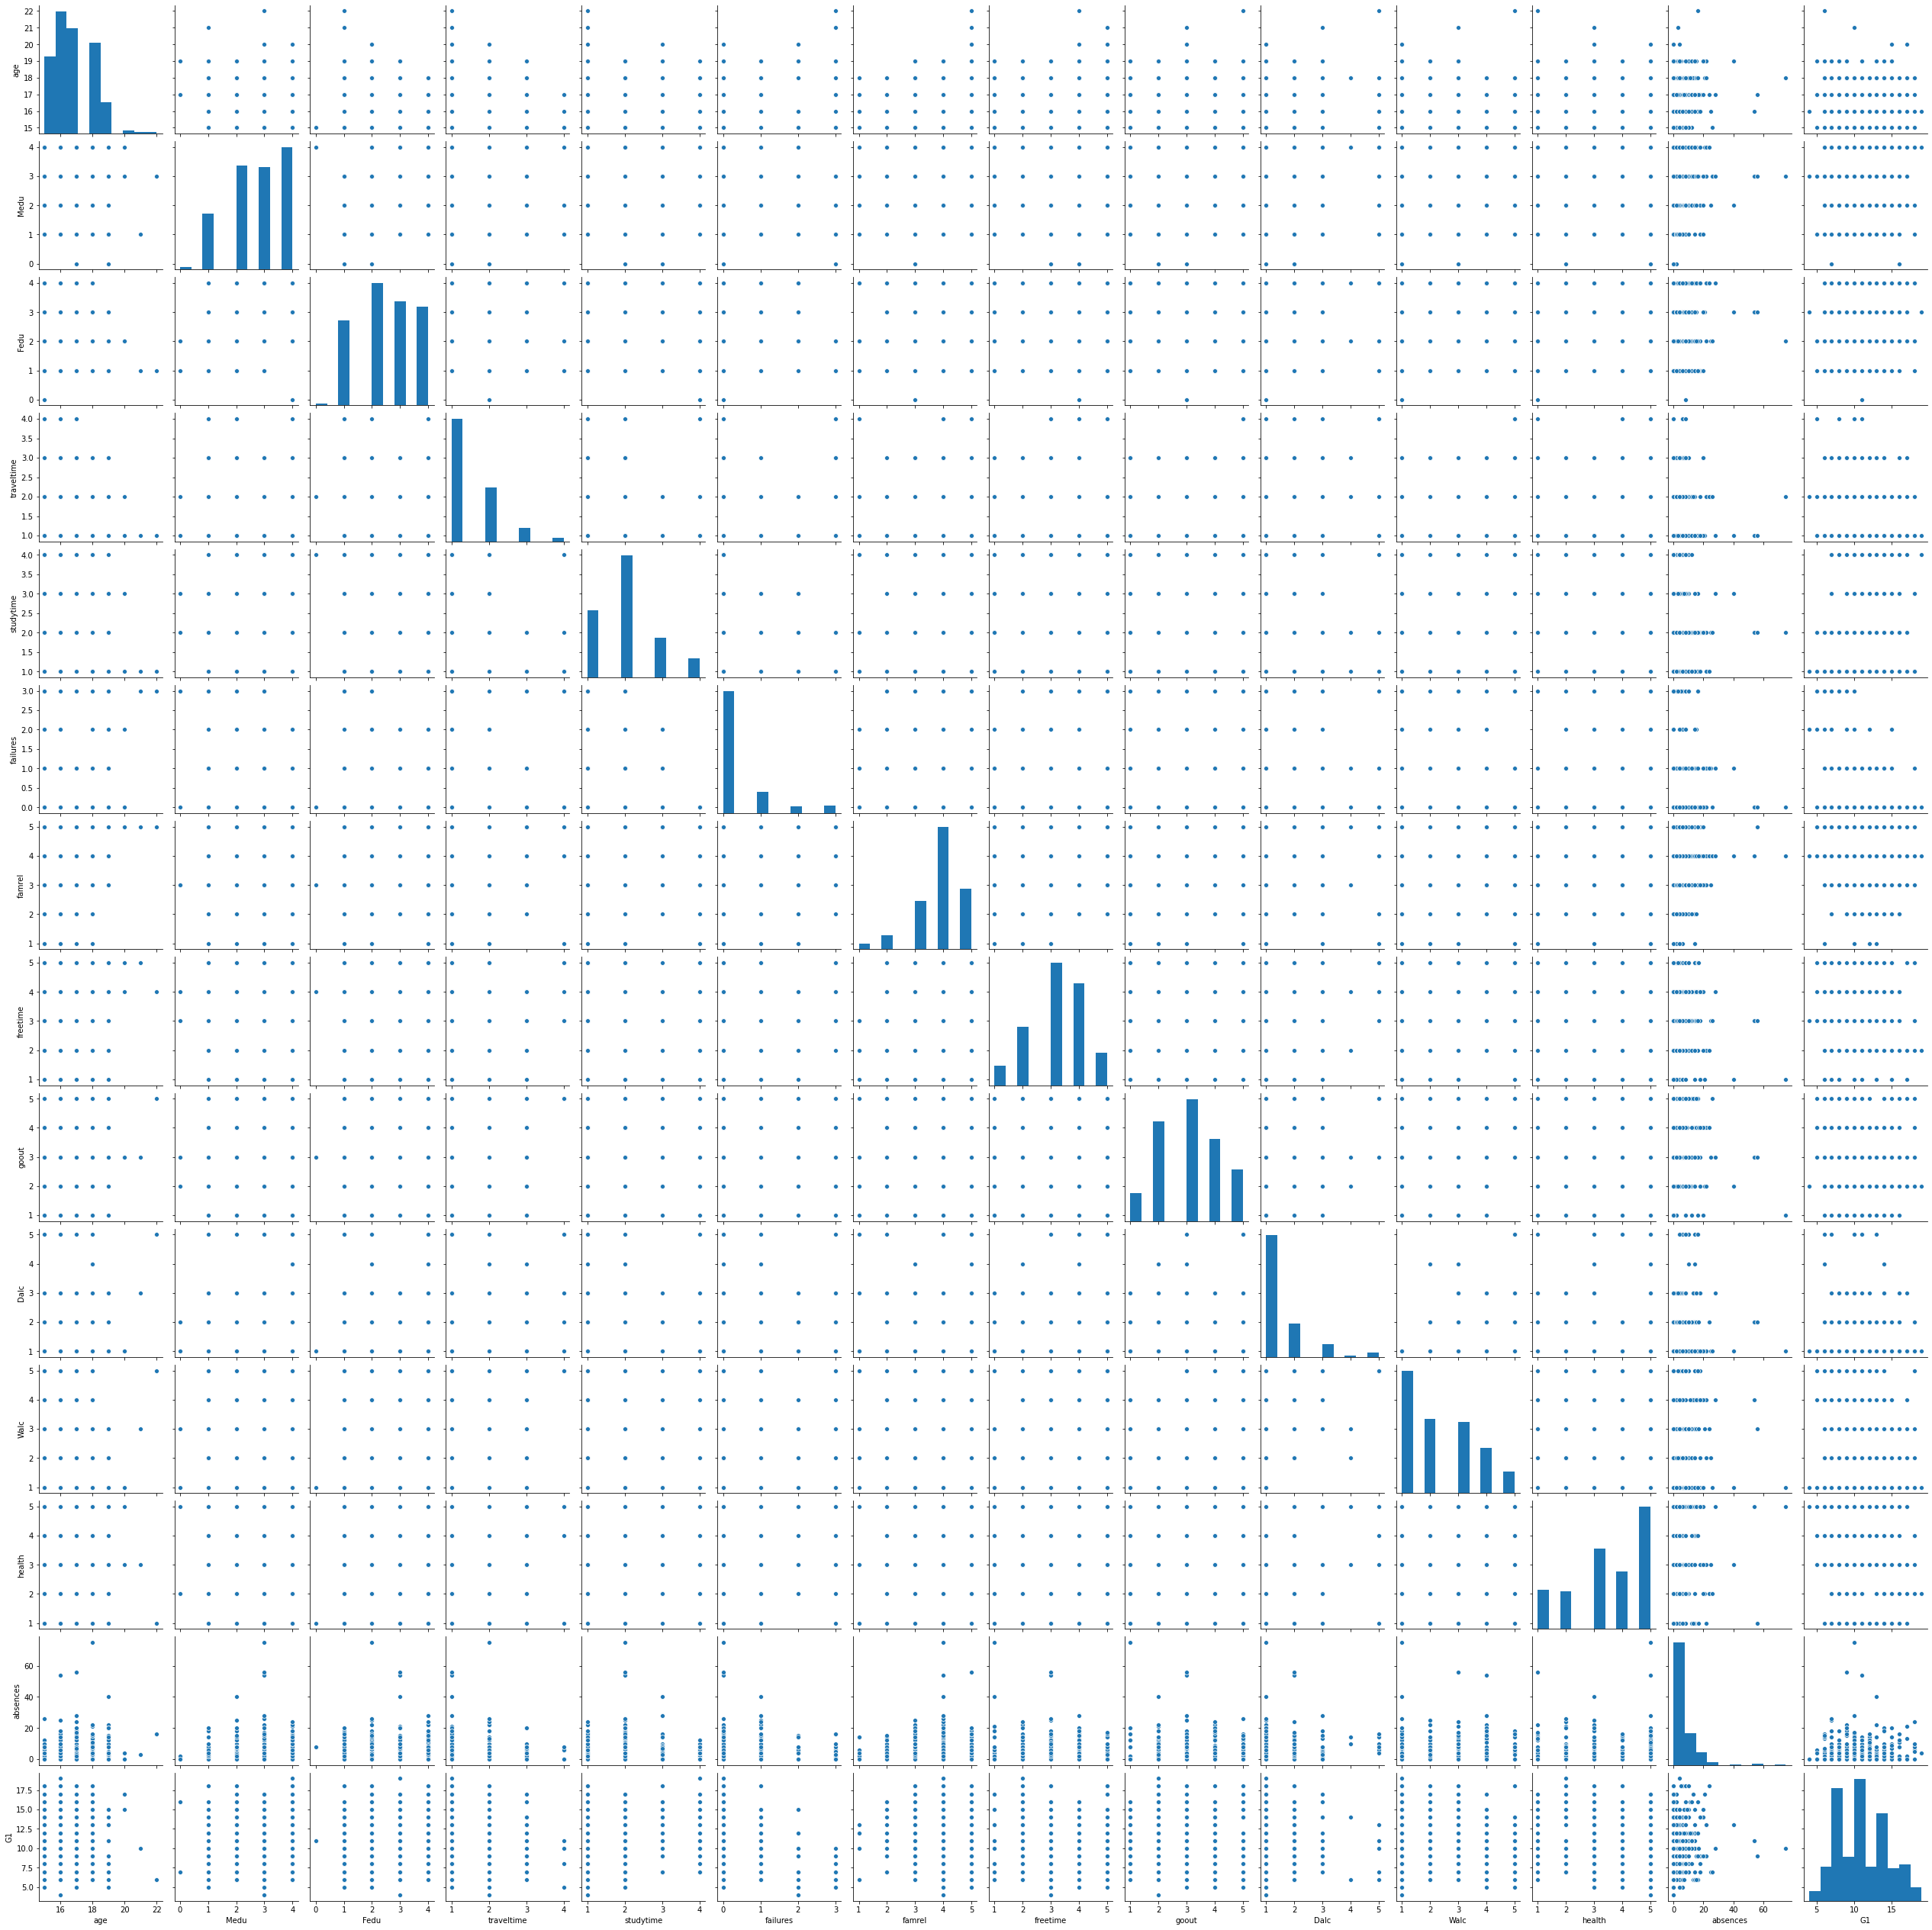

In [45]:
sns.pairplot(train)

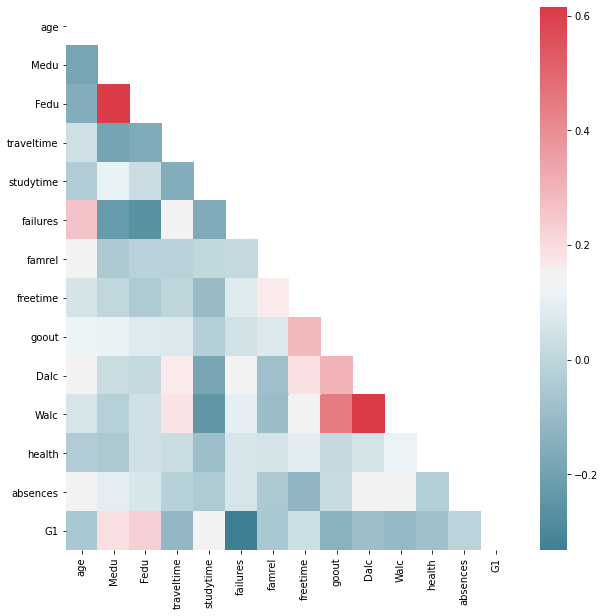

In [46]:
cor = train.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool) )
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=[10,10])
sns.heatmap(cor, mask=mask, cmap=cmap)

## Run the SVM on baseline model

In [57]:
svm1 = svm.SVC()
svm1.fit(X_train, y_train)

ValueError: ignored

In [25]:
mask

array([[ 1.        , -0.16365842, -0.16343807,  0.07064072, -0.00414004,
         0.24366538,  0.0539401 ,  0.01643439,  0.12696388,  0.1311246 ,
         0.11727605, -0.06218737,  0.17523008, -0.0640815 ],
       [ 0.        ,  1.        ,  0.62345511, -0.1716393 ,  0.06494414,
        -0.23667996, -0.00391446,  0.03089087,  0.06409444,  0.0198341 ,
        -0.04712346, -0.04687783,  0.10028482,  0.205341  ],
       [ 0.        ,  0.        ,  1.        , -0.15819405, -0.00917464,
        -0.25040844, -0.00136973, -0.01284553,  0.04310467,  0.00238643,
        -0.01263102,  0.01474154,  0.02447289,  0.19026994],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.10090912,
         0.09223875, -0.01680799, -0.01702494,  0.02853967,  0.13832531,
         0.13411575,  0.00750061, -0.01294378, -0.09303999],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.17356303,  0.0397307 , -0.14319841, -0.06390368, -0.19601926,
        -0.25378473, -0.07